In [1]:
import numpy as np
import xarray as xr

In [5]:
import xarray as xr
era5_sshf = xr.open_dataset("/project2/rossby/group11/era5_sshf_1979_2020_tzmean.nc")['sshf'].values
era5_slhf = xr.open_dataset("/project2/rossby/group11/era5_slhf_1979_2020_tzmean.nc")['slhf'].values
era5_ssr = xr.open_dataset("/project2/rossby/group11/era5_ssr_1979_2020_tzmean.nc")['ssr'].values #surface solar radiation (downward)
era5_str = xr.open_dataset("/project2/rossby/group11/era5_str_1979_2020_tzmean.nc")['str'].values #surface net thermal radiation (downward)
era5_tsr = xr.open_dataset("/project2/rossby/group11/era5_tsr_1979_2020_tzmean.nc")['tsr'].values #TOA solar radiation (shortwave, up)
era5_ttr = xr.open_dataset("/project2/rossby/group11/era5_ttr_1979_2020_tzmean.nc")['ttr'].values#TOA thermal radiation (longwave, up)

lat = xr.open_dataset("/project2/rossby/group11/era5_sshf_1979_2020_tzmean.nc")['latitude'].values

Text(0, 0.5, 'Energy Flux (W m$^{-2}$)')

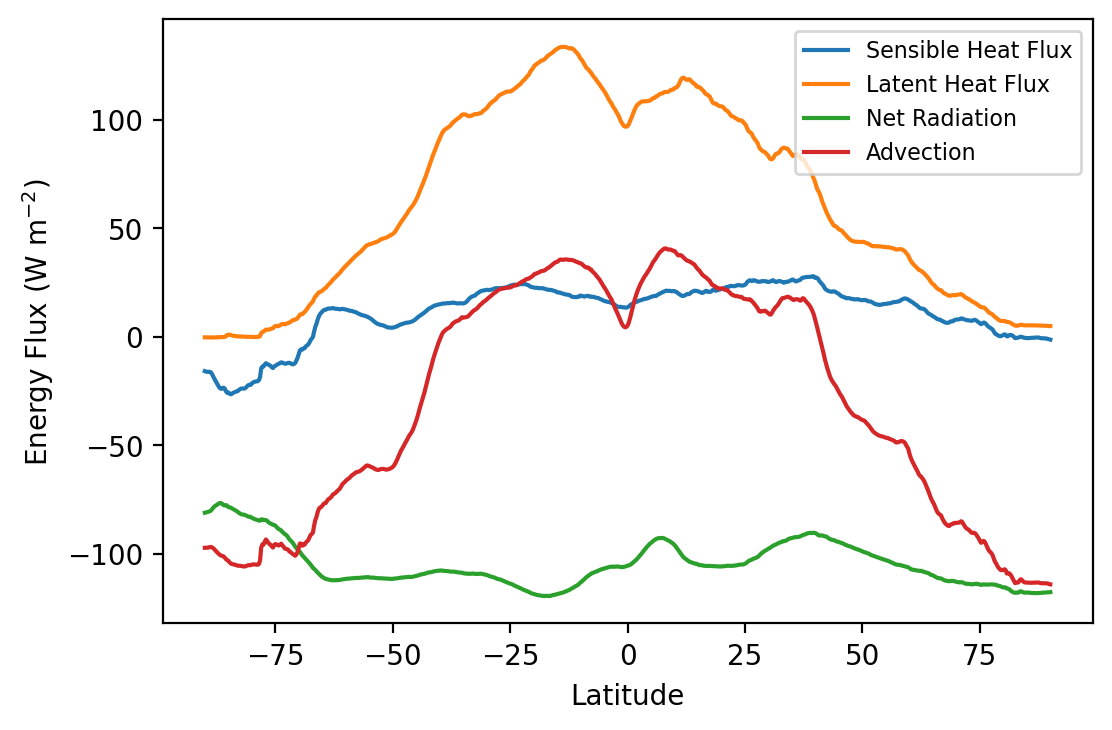

In [6]:
import matplotlib.pyplot as plt
era5_sshf_wm2 = era5_sshf/86400
era5_slhf_wm2 = era5_slhf/86400
era5_ra_wm2 = (era5_tsr + era5_ttr - era5_ssr - era5_str)/86400
era5_fa_wm2 = era5_ra_wm2 - era5_sshf_wm2 - era5_slhf_wm2
plt.figure(dpi=200)
plt.plot(lat, -era5_sshf_wm2, label = "Sensible Heat Flux")
plt.plot(lat, -era5_slhf_wm2, label = "Latent Heat Flux")
plt.plot(lat, era5_ra_wm2, label = "Net Radiation")
plt.plot(lat, era5_fa_wm2, label = "Advection")
plt.legend(prop={'size': 8})
plt.xlabel("Latitude")
plt.ylabel(r"Energy Flux (W m$^{-2}$)")
#positive: into the column
#negative: out of the column

Text(0, 0.5, 'R1 (unitless)')

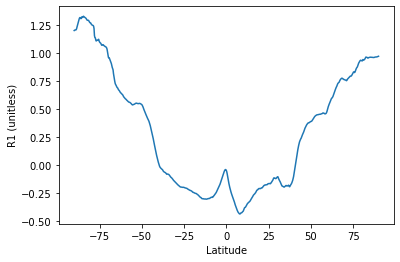

In [13]:
R1 = era5_fa_wm2/era5_ra_wm2
plt.plot(lat, R1)
plt.xlabel("Latitude")
plt.ylabel("R1 (unitless)")

In [2]:
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_radcs_1979_2020.nc'
with xr.open_dataset(filesource) as ds:
    latitude = ds['latitude'].values
    era5_ssrc = ds['ssrc'].mean(['time','longitude']).values#incoming, from out
    era5_strc = ds['strc'].mean(['time','longitude']).values#incoming, from surface
    era5_tsrc = ds['tsrc'].mean(['time','longitude']).values#outgoing, TOA, shortwave
    era5_ttrc = ds['ttrc'].mean(['time','longitude']).values#outgoing, TOA, longwave/thermal

In [3]:
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'
with xr.open_dataset(filesource) as ds:
    lat = ds['latitude'].values
    era5_ssr = ds['ssr'].mean(['time','longitude']).values#incoming, from out, shortwave
    era5_str = ds['str'].mean(['time','longitude']).values#incoming, from surface, longwave
    era5_tsr = ds['tsr'].mean(['time','longitude']).values#outgoing, TOA, shortwave
    era5_ttr = ds['ttr'].mean(['time','longitude']).values#outgoing, TOA, longwave/thermal

In [7]:
clr = (era5_tsrc + era5_ttrc - era5_ssrc - era5_strc)/86400
tot_rad = (era5_tsr + era5_ttr - era5_ssr - era5_str)/86400
acre = tot_rad - clr
tot_rad_sw = (era5_tsr - era5_ssr)/86400
tot_rad_lw = (era5_ttr - era5_str)/86400
clr_sw = (era5_tsrc - era5_ssrc)/86400
clr_lw = (era5_ttrc - era5_strc)/86400
acre_sw = tot_rad_sw - clr_sw
acre_lw = tot_rad_lw - clr_lw

era5_fa_wm2 = tot_rad - (era5_sshf + era5_slhf)/86400

R1_cre = acre/tot_rad
R1_cre_sw = acre_sw/tot_rad
R1_cre_lw = acre_lw/tot_rad
R2 = (-era5_sshf - era5_slhf)/86400/tot_rad
R1 = era5_fa_wm2/tot_rad
R1_clr = clr/tot_rad

Text(60, -0.25, 'RCE')

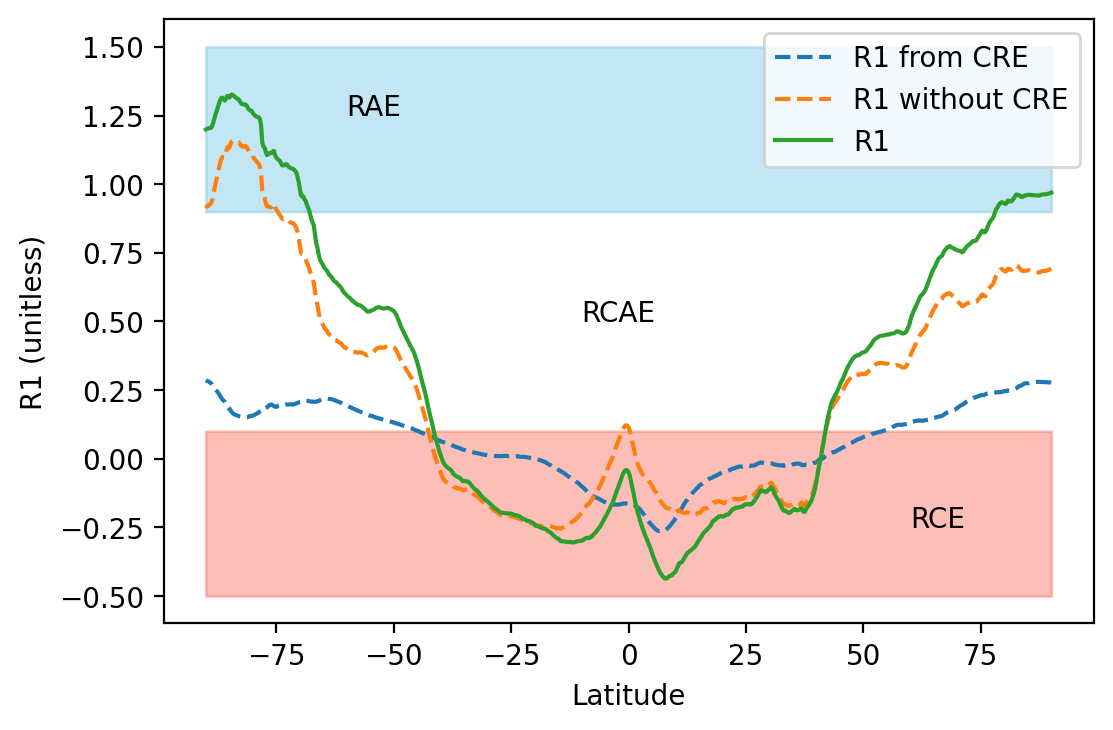

In [25]:
import matplotlib.pyplot as plt
plt.figure(dpi=200)
plt.plot(lat, R1_cre, label = "R1 from CRE", linestyle = "--")
plt.plot(lat, R1 - R1_cre, label = "R1 without CRE", linestyle = "--")
#plt.plot(lat, R1_cre_sw, label = "R1 from SW CRE", linestyle = "--")
#plt.plot(lat, R1_cre_lw, label = "R1 from lw CRE", linestyle = "--")
#plt.plot(lat, R1_clr, label = "R1 from Clear Sky", linestyle = "--")
plt.plot(lat, R1, label = "R1")
plt.xlabel("Latitude")
plt.ylabel("R1 (unitless)")
plt.legend()
plt.fill_between(lat, 0.9, 1.5, color='skyblue',
                 alpha=0.5)
plt.fill_between(lat, 0.1, -0.5, color='salmon',
                 alpha=0.5)
plt.text(-60, 1.25, "RAE")
plt.text(-10, 0.5, "RCAE")
plt.text(60, -0.25, "RCE")

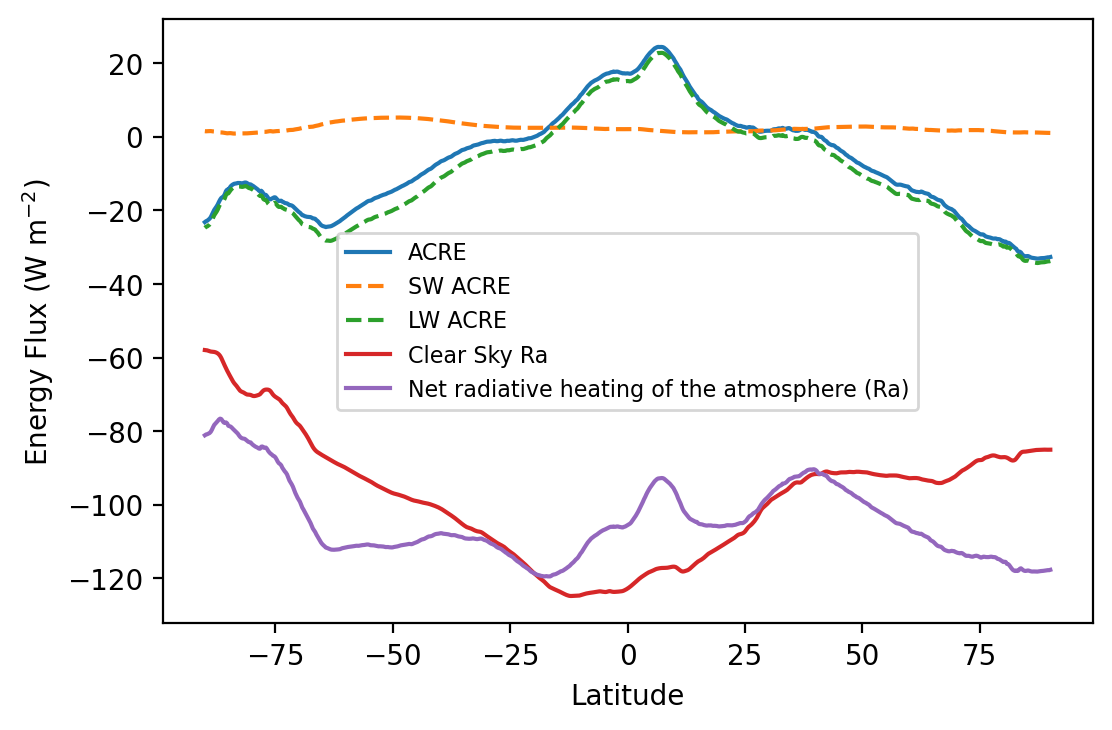

In [10]:
plt.figure(dpi=200)
plt.plot(lat, acre, label = "ACRE")
plt.plot(lat, acre_sw, label = "SW ACRE", linestyle = "--")
plt.plot(lat, acre_lw, label = "LW ACRE", linestyle = "--")
plt.plot(lat, clr, label = "Clear Sky Ra")
plt.plot(lat, tot_rad, label = "Net radiative heating of the atmosphere (Ra)")
plt.xlabel("Latitude")
plt.ylabel(r"Energy Flux (W m$^{-2}$)")
plt.legend(prop={'size': 8})

In [7]:
filesource = '/project2/rossby/group11/cc_1979_2021_mean.nc'
with xr.open_dataset(filesource) as ds:
    ds['level'] = ds.level/1000
    cloud_fraction = ds['cc']

In [4]:
print(cloud_fraction)

<xarray.DataArray 'cc' (time: 1, level: 37, latitude: 721, longitude: 1440)>
[38414880 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) float64 0.001 0.002 0.003 0.005 ... 0.925 0.95 0.975 1.0
  * time       (time) datetime64[ns] 1979-01-01
Attributes:
    units:      (0 - 1)
    long_name:  Fraction of cloud cover


In [2]:
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'
with xr.open_dataset(filesource) as ds:
    lat = ds['latitude'].values
    era5_ssr = ds['ssr'].mean(['time'])#incoming, from out, shortwave
    era5_str = ds['str'].mean(['time'])#incoming, from surface, longwave
    era5_tsr = ds['tsr'].mean(['time'])#outgoing, TOA, shortwave
    era5_ttr = ds['ttr'].mean(['time'])#outgoing, TOA, longwave/thermal

In [3]:
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_stf_1979_2020.nc'
with xr.open_dataset(filesource) as ds:
    lat = ds['latitude'].values
    lon = ds['longitude'].values
    era5_sshf = ds['sshf'].mean(['time'])
    era5_slhf = ds['slhf'].mean(['time'])

In [4]:
tot_rad = (era5_tsr + era5_ttr - era5_ssr - era5_str)/86400
era5_fa_wm2 = tot_rad - (era5_sshf + era5_slhf)/86400
R1 = era5_fa_wm2/tot_rad

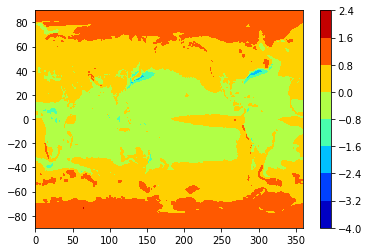

In [5]:
import matplotlib.pyplot as plt
import matplotlib
plt.contourf(lon,lat,R1,cmap='jet')
plt.colorbar()

In [8]:
bins = np.arange(-0.6,1.6,0.2)
print(bins)
cloud_fraction_binned = cloud_fraction.groupby_bins(R1,bins).mean().squeeze()
#cloud_fraction_binned = cloud_fraction_binned.drop_vars('time')
print(cloud_fraction_binned)
cloud_fraction_binned_2 = cloud_fraction_binned.where(
    cloud_fraction_binned['level'] > 0.05, drop=True)

[-6.00000000e-01 -4.00000000e-01 -2.00000000e-01  1.11022302e-16
  2.00000000e-01  4.00000000e-01  6.00000000e-01  8.00000000e-01
  1.00000000e+00  1.20000000e+00  1.40000000e+00]
<xarray.DataArray 'cc' (level: 37, group_bins: 10)>
array([[4.08803052e-18, 4.08803052e-18, 4.08803052e-18, 4.08803052e-18,
        4.08803052e-18, 4.08803052e-18, 4.08803052e-18, 4.08803052e-18,
        4.08803052e-18, 4.08803052e-18],
       [4.08803052e-18, 4.08803052e-18, 4.08803052e-18, 4.08803052e-18,
        4.08803052e-18, 4.08803052e-18, 4.08803052e-18, 4.08803052e-18,
        4.08803052e-18, 4.08803052e-18],
       [4.08803052e-18, 4.08803052e-18, 4.08803052e-18, 4.08803052e-18,
        3.28889761e-11, 2.64786643e-13, 4.08803052e-18, 2.14953802e-11,
        4.08803052e-18, 4.08803052e-18],
       [4.08803052e-18, 4.08803052e-18, 4.08803052e-18, 1.27213437e-12,
        1.46415178e-10, 9.13624949e-11, 1.20974849e-09, 6.93777131e-09,
        1.63877910e-08, 2.63362431e-11],
       [7.68109167e-13, 2.15

[[-0.6  1.4]]


Text(0.5, 1.0, 'R1')

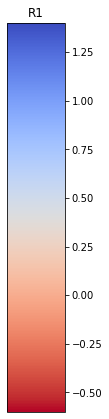

In [78]:
import pylab as pl
import numpy as np

a = np.array([[-0.6,1.4]])
print(a)
pl.figure(figsize=(1,9))
img = pl.imshow(a, cmap=plt.cm.coolwarm_r)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation="vertical", cax=cax)
pl.title("R1")

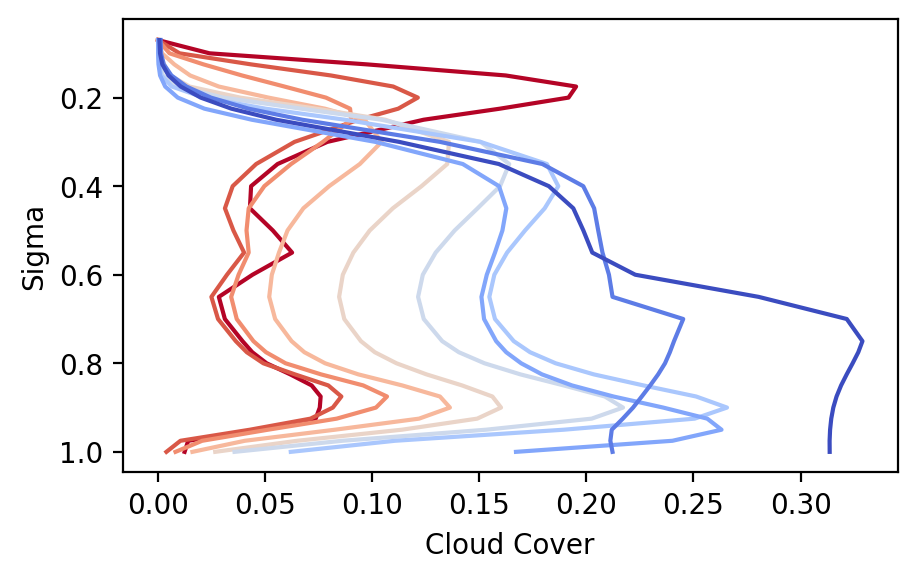

In [18]:
plt.figure(figsize=(5,3),dpi=200)
cm = plt.cm.coolwarm_r(np.linspace(0, 1, 10))

# plot
ax = plt.subplot(111)
ax.set_prop_cycle('color', list(cm))

#s_m = matplotlib.cm.ScalarMappable(cmap=cm)
ax = cloud_fraction_binned_2.plot.line(y="level", hue="group_bins", add_legend=False)
#plt.colorbar(s_m)
plt.title("")
plt.xlabel("Cloud Cover")
plt.ylabel("Sigma")
plt.gca().invert_yaxis()
plt.show()

In [11]:
filesource = '/project2/rossby/group11/ciwc_1979_2021_mean.nc'
with xr.open_dataset(filesource) as ds:
    ds['level'] = ds.level/1000
    ciwc = ds['ciwc']
    
print(ciwc)

<xarray.DataArray 'ciwc' (time: 1, level: 37, latitude: 721, longitude: 1440)>
[38414880 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) float64 0.001 0.002 0.003 0.005 ... 0.925 0.95 0.975 1.0
  * time       (time) datetime64[ns] 1979-01-01
Attributes:
    units:      kg kg**-1
    long_name:  Specific cloud ice water content


In [12]:
bins = np.arange(-0.6,1.6,0.2)
ciwc_binned = ciwc.groupby_bins(R1,bins).mean().squeeze()
ciwc_binned_2 = ciwc_binned.where(
    ciwc_binned['level'] > 0.05, drop=True)

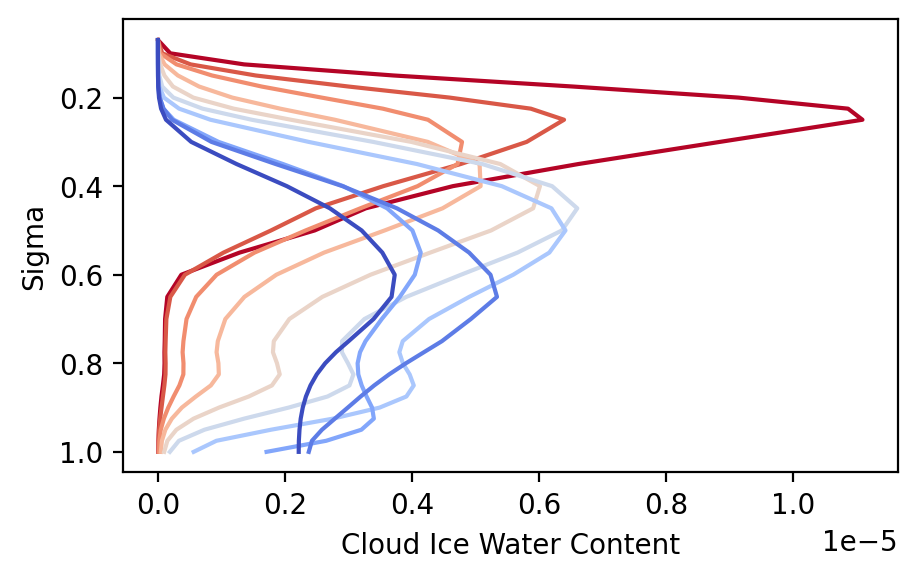

In [13]:
plt.figure(figsize=(5,3), dpi=200)
cm = plt.cm.coolwarm_r(np.linspace(0, 1, 10))

# plot
ax = plt.subplot(111)
ax.set_prop_cycle('color', list(cm))

#s_m = matplotlib.cm.ScalarMappable(cmap=cm)
ax = ciwc_binned_2.plot.line(y="level", hue="group_bins", add_legend=False)
#plt.colorbar(s_m)
plt.title("")
plt.xlabel("Cloud Ice Water Content")
plt.ylabel("Sigma")
plt.gca().invert_yaxis()
plt.show()

In [14]:
filesource = '/project2/rossby/group11/clwc_1979_2021_mean.nc'
with xr.open_dataset(filesource) as ds:
    ds['level'] = ds.level/1000
    clwc = ds['clwc']

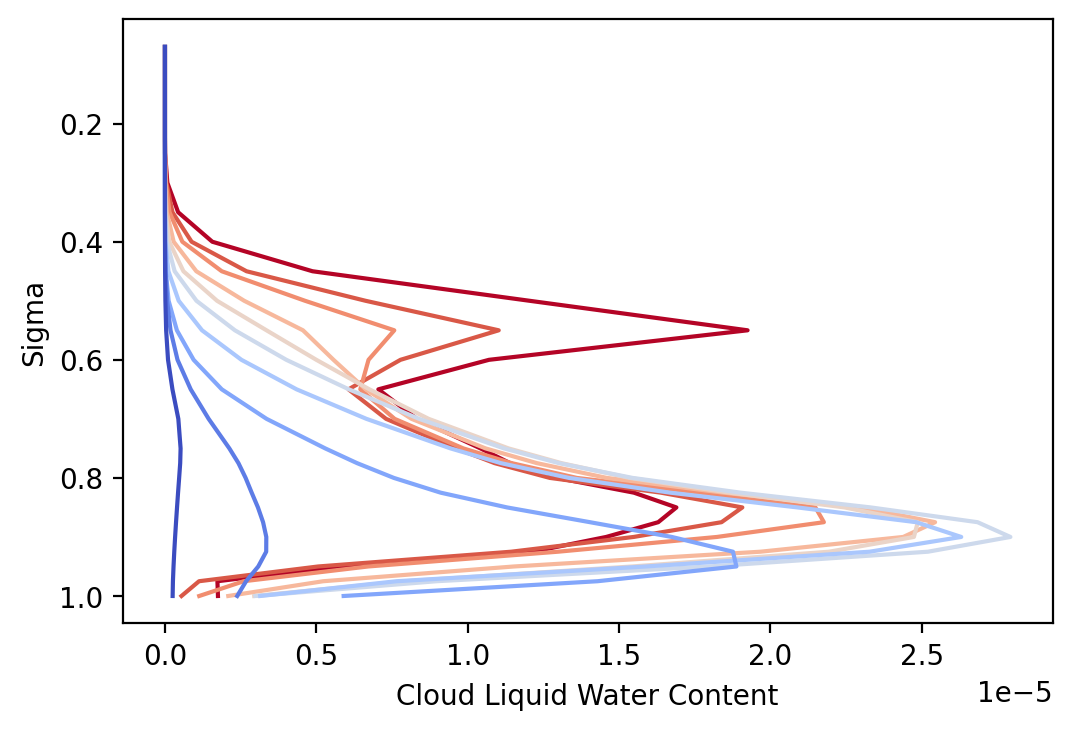

In [15]:
bins = np.arange(-0.6,1.6,0.2)
clwc_binned = clwc.groupby_bins(R1,bins).mean().squeeze()
clwc_binned_2 = clwc_binned.where(
    clwc_binned['level'] > 0.05, drop=True)

plt.figure(dpi=200)
cm = plt.cm.coolwarm_r(np.linspace(0, 1, 10))

# plot
ax = plt.subplot(111)
ax.set_prop_cycle('color', list(cm))

#s_m = matplotlib.cm.ScalarMappable(cmap=cm)
ax = clwc_binned_2.plot.line(y="level", hue="group_bins", add_legend=False)
#plt.colorbar(s_m)
plt.title("")
plt.xlabel("Cloud Liquid Water Content")
plt.ylabel("Sigma")
plt.gca().invert_yaxis()
plt.show()

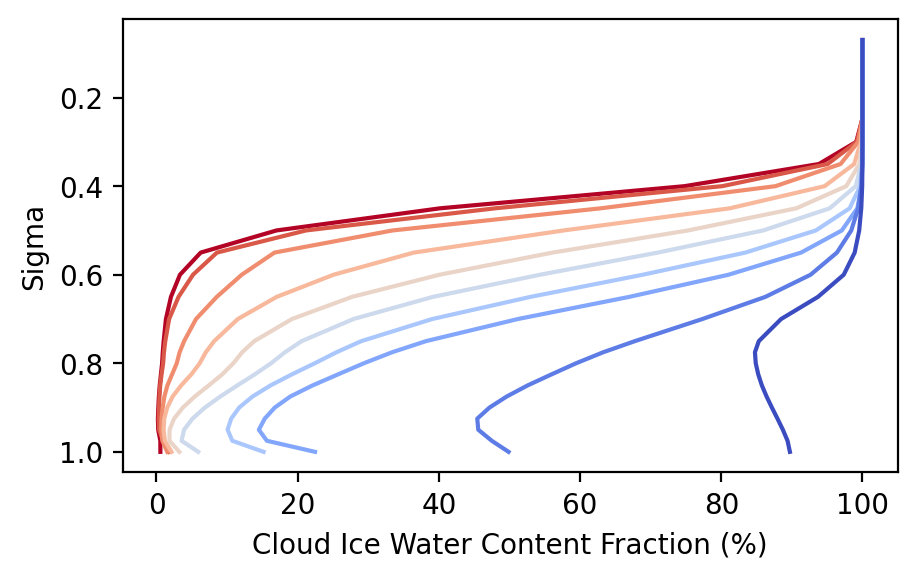

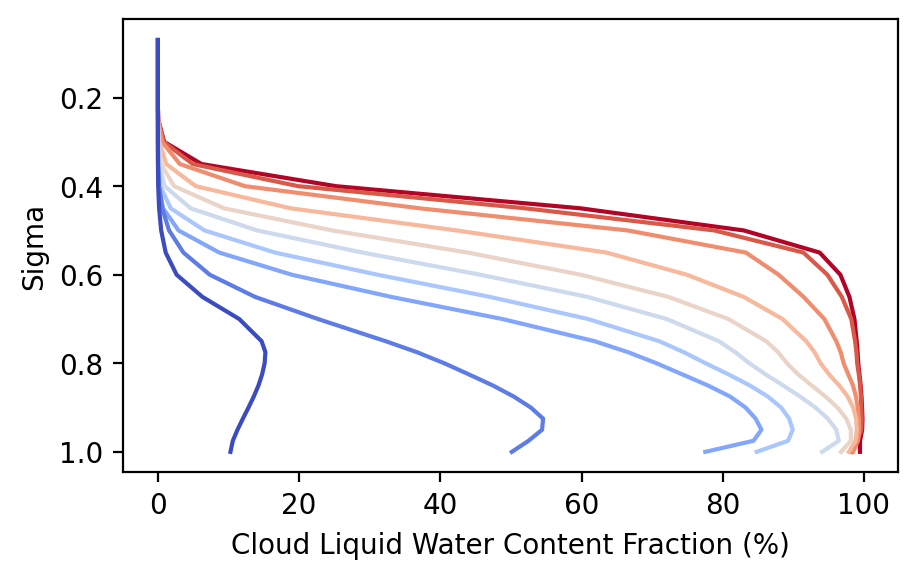

In [17]:
cloud_ice_fraction = ciwc_binned/(ciwc_binned + clwc_binned) * 100
cloud_liquid_fraction = clwc_binned/(ciwc_binned + clwc_binned) * 100
cloud_ice_fraction_2 = cloud_ice_fraction.where(
    cloud_ice_fraction['level'] > 0.05, drop=True)
cloud_liquid_fraction_2 = cloud_liquid_fraction.where(
    cloud_liquid_fraction['level'] > 0.05, drop=True)
plt.figure(figsize=(5,3),dpi=200)
cm = plt.cm.coolwarm_r(np.linspace(0, 1, 10))

# plot
ax = plt.subplot(111)
ax.set_prop_cycle('color', list(cm))

#s_m = matplotlib.cm.ScalarMappable(cmap=cm)
ax = cloud_ice_fraction_2.plot.line(y="level", hue="group_bins", add_legend=False)
#plt.colorbar(s_m)
plt.title("")
plt.xlabel("Cloud Ice Water Content Fraction (%)")
plt.ylabel("Sigma")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(5,3),dpi=200)
cm = plt.cm.coolwarm_r(np.linspace(0, 1, 10))

# plot
ax = plt.subplot(111)
ax.set_prop_cycle('color', list(cm))

#s_m = matplotlib.cm.ScalarMappable(cmap=cm)
ax = cloud_liquid_fraction_2.plot.line(y="level", hue="group_bins", add_legend=False)
#plt.colorbar(s_m)
plt.title("")
plt.xlabel("Cloud Liquid Water Content Fraction (%)")
plt.ylabel("Sigma")
plt.gca().invert_yaxis()
plt.show()

In [58]:
## read in temperature data
filesource = '/project2/rossby/group11/era5_t_1979_2021_monthly_tmean.nc'
with xr.open_dataset(filesource) as ds:
    ds['level'] = ds.level/1000
    ds = ds.reindex(lat=ds.lat[::-1])
    ds = ds.rename_dims(dims_dict={
  "lon": "longitude",
  "lat": "latitude",
})
    temp = ds['t']
    print(temp)

<xarray.DataArray 't' (level: 37, latitude: 180, longitude: 360)>
[2397600 values with dtype=float64]
Coordinates:
    lat      (latitude) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
    lon      (longitude) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * level    (level) float64 0.001 0.002 0.003 0.005 ... 0.925 0.95 0.975 1.0
Dimensions without coordinates: latitude, longitude
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K
    cell_methods:   time: mean


In [57]:
R1_coarse = R1.coarsen(longitude=4, latitude=4, boundary='trim').mean()
bins = np.arange(-0.6,1.6,0.2)
R1_coarse1 = R1_coarse.assign_coords(longitude=R1_coarse.longitude-0.375, latitude=R1_coarse.latitude-0.12)
print(R1_coarse1)

<xarray.DataArray 'group' (latitude: 180, longitude: 360)>
array([[0.96092448, 0.96086158, 0.96079934, ..., 0.96093991, 0.96094015,
        0.96094324],
       [0.95160119, 0.95159595, 0.95159165, ..., 0.95142861, 0.95149291,
        0.95156126],
       [0.94620569, 0.9460056 , 0.94579593, ..., 0.94620266, 0.94621932,
        0.94624838],
       ...,
       [1.29305578, 1.29345153, 1.29380776, ..., 1.28859523, 1.29027151,
        1.29199002],
       [1.26170905, 1.26156297, 1.26137564, ..., 1.25982203, 1.2605391 ,
        1.26129331],
       [1.23352226, 1.23404634, 1.23457051, ..., 1.23188746, 1.23244072,
        1.23298949]])
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5


In [59]:
temp1 = temp.reset_coords('lat',drop=True)
temp2 = temp1.reset_coords('lon',drop=True)
temp_new = temp2.assign_coords({"longitude": R1_coarse1.longitude, "latitude": R1_coarse1.latitude})
print(temp_new)

<xarray.DataArray 't' (level: 37, latitude: 180, longitude: 360)>
[2397600 values with dtype=float64]
Coordinates:
  * level      (level) float64 0.001 0.002 0.003 0.005 ... 0.925 0.95 0.975 1.0
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K
    cell_methods:   time: mean


In [60]:
temp_binned = temp_new.groupby_bins(R1_coarse1,bins).mean()

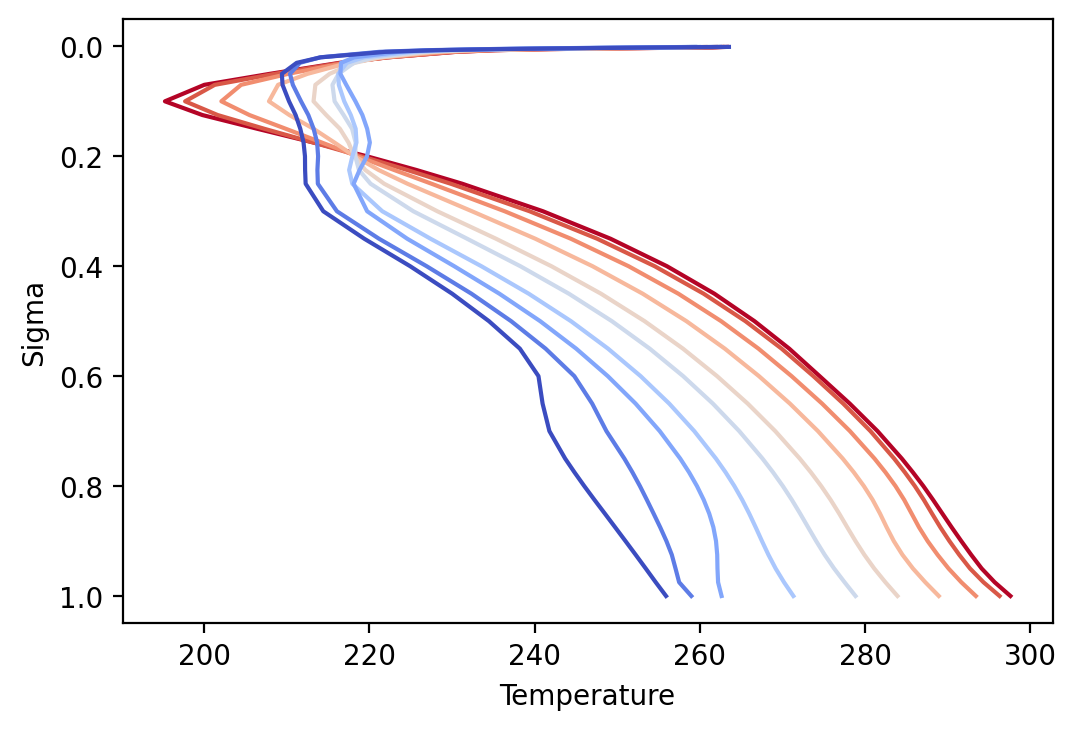

In [61]:
plt.figure(dpi=200)
cm = plt.cm.coolwarm_r(np.linspace(0, 1, 10))
ax = plt.subplot(111)
ax.set_prop_cycle('color', list(cm))

#s_m = matplotlib.cm.ScalarMappable(cmap=cm)
ax = temp_binned.plot.line(y="level", hue="group_bins", add_legend=False)
#plt.colorbar(s_m)
plt.title("")
plt.xlabel("Temperature")
plt.ylabel("Sigma")
plt.gca().invert_yaxis()
plt.show()